## Coding Exercise #0804

In [1]:
#To enable CPU execution only
#import os
#os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [1]:
# Available backend options are: "jax", "tensorflow", "torch".
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

### 1. Convolutional Neural Network with Keras (color images):

In [2]:
# Install if necessary.
#!pip install keras

In [3]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings                   
from sklearn.model_selection import train_test_split
from keras.datasets.cifar10 import load_data
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical
from keras.optimizers import Adam, RMSprop, SGD
warnings.filterwarnings('ignore')                  # Turn the warnings off.
%matplotlib inline

#### 1.1. Read in the data:

More information about the dataset can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In [4]:
# Bring in the data.
(X_train, y_train), (X_test, y_test) = load_data()
n_train_size = X_train.shape[0]

In [5]:
# View the shapes.
print("-"*50)
print("Training data X shape: {}".format(X_train.shape))
print("Training data y shape: {}".format(y_train.shape))
print("-"*50)
print("Test data X shape: {}".format(X_test.shape))
print("Test data y shape: {}".format(y_test.shape))
print("-"*50)

--------------------------------------------------
Training data X shape: (50000, 32, 32, 3)
Training data y shape: (50000, 1)
--------------------------------------------------
Test data X shape: (10000, 32, 32, 3)
Test data y shape: (10000, 1)
--------------------------------------------------


#### 1.2. Visualize the data:

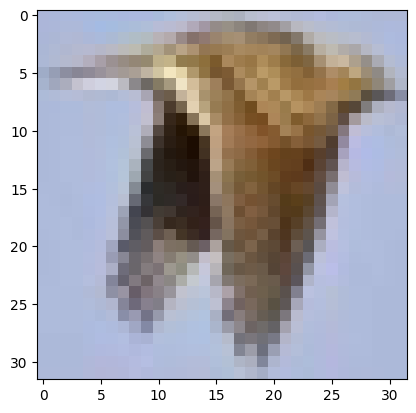

In [6]:
i_image = 123                                   # You may change this at will. 
plt.imshow(X_train[i_image,:,:])
plt.show()

#### 1.3. Prepare the data:

In [7]:
# Scaling.
X_train = X_train/255                   
X_test = X_test/255                        

In [8]:
# Reshaping.
X_train = X_train.reshape(-1,32,32,3)
X_test = X_test.reshape(-1,32,32,3)

In [9]:
# One-hot-encoding.
y = np.concatenate([y_train,y_test],axis=0)
y = to_categorical(y,10)
y_train = y[:n_train_size,:]
y_test = y[n_train_size:,:]

#### 1.4. Define a CNN model:

In [10]:
drop_prob = 0.7
my_model = Sequential()
# 1st convolution + pooling.
my_model.add(Conv2D(input_shape=(32,32,3),filters=32,kernel_size=(5,5),padding='same',activation="relu"))        # 3 channels of color.
my_model.add(MaxPooling2D(pool_size=2))
# 2nd convolution + pooling.
my_model.add(Conv2D(filters=64,kernel_size=(5,5), padding='same',activation="relu"))
my_model.add(MaxPooling2D(pool_size=2))
# Flattened fully connected layer.
my_model.add(Flatten())
my_model.add(Dense(units = 1024, activation="relu"))
# Apply dropout.
my_model.add(Dropout(rate=drop_prob))
# Output layer.
my_model.add(Dense(units = 10, activation="softmax"))

In [11]:
# View the summary.
my_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,259,274 (16.25 MB)

 Trainable params: 4,259,274 (16.25 MB)

 Non-trainable params: 0 (0.00 B)

#### 1.5. Define the hyperparameters and optimizer:

In [12]:
# Hyperparameters.
n_epochs = 20
batch_size = 20
learn_rate = 0.0001

In [13]:
# Define the optimizer and then compile.
my_optimizer=Adam(learning_rate=learn_rate)
my_model.compile(loss = "categorical_crossentropy", optimizer = my_optimizer, metrics=["accuracy"])

#### 1.6. Train the model and visualize the history:

In [15]:
# Train the model.
# verbose = 0 means no output. verbose = 1 to view the epochs.
my_summary = my_model.fit(X_train, y_train, epochs=n_epochs, batch_size = batch_size, validation_split = 0.3, verbose = 0)

187.75627875328064


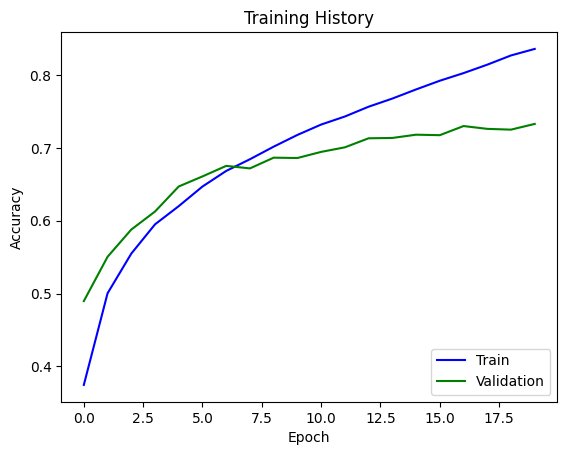

In [16]:
# Visualize the training history. 
n_skip = 0                 # Skip the first few steps.
plt.plot(my_summary.history['accuracy'][n_skip:], c="b")
plt.plot(my_summary.history['val_accuracy'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

#### 1.7. Testing: 

In [18]:
ACC = my_model.evaluate(X_test, y_test, verbose=0)[1]    
print("Test Accuracy : {}".format(np.round(ACC,3)))

Test Accuracy : 0.727
